In [12]:
# Data Import and Examination

# Training data

import pandas as pd
import numpy as np

folderpath='./human-protein-atlas-image-classification/'
train_target=pd.read_csv(folderpath+'train.csv')
train_target.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [13]:
train_target.size

62144

A total number of 62,144 training data are included in the Human Protein Image dataset.

In [14]:
def class_expand(datarow):
    labels=np.array(datarow['Target'].split()).astype(int)
    for label in labels:
        col_name='Cls'+str(label)
        datarow[col_name]=1
    return datarow

In [15]:
# Convert train and test target into binary dataframe
col_names=[]
tot_class=28
for i in range(28):
    col_names.append('Cls'+str(i))
df = pd.DataFrame(columns = col_names)
train_target2=train_target.join(df).fillna(0)
train_target2=train_target2.apply(class_expand, axis=1)
train_target2.head()

,Id,Target,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# Save the processed training file
out_trainfile=folderpath+'train_v2.csv'
train_target2.to_csv(out_trainfile, index=None, encoding='utf-8')

In [6]:
train_class_cnt=pd.DataFrame(train_target2[col_names].sum(axis=0).sort_values(ascending=False)).reset_index()
train_class_cnt.columns=['Class','Counts']
train_class_cnt.head()

,Class,Counts
0,Cls0,12885
1,Cls25,8228
2,Cls21,3777
3,Cls2,3621
4,Cls23,2965


In [7]:
# Data Exploration

## Distribution of class labels in training data set

label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

class_labels=pd.DataFrame(columns=['Class','Label_Name'])
class_labels
for k,v in label_names.items():
    class_labels=class_labels.append({'Class': 'Cls'+str(k), 'Label_Name':v}, ignore_index=True)
class_labels.head()

,Class,Label_Name
0,Cls0,Nucleoplasm
1,Cls1,Nuclear membrane
2,Cls2,Nucleoli
3,Cls3,Nucleoli fibrillar center
4,Cls4,Nuclear speckles


In [8]:
train_class_cnt2=train_class_cnt.merge(class_labels, on='Class')
total_cnt=train_class_cnt2['Counts'].sum()
#print(total_cnt)
train_class_cnt2.loc[:,'Prct']=train_class_cnt2['Counts']/total_cnt*100.0
train_class_cnt2.head()

,Class,Counts,Label_Name,Prct
0,Cls0,12885,Nucleoplasm,25.373164
1,Cls25,8228,Cytosol,16.202591
2,Cls21,3777,Plasma membrane,7.437675
3,Cls2,3621,Nucleoli,7.130479
4,Cls23,2965,Mitochondria,5.838683


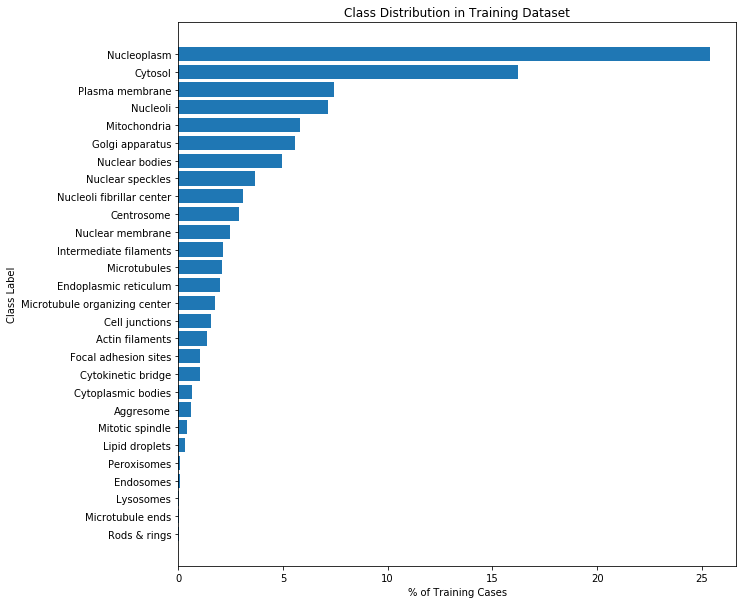

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(train_class_cnt2['Label_Name'], train_class_cnt2['Prct'])
plt.gca().invert_yaxis()
plt.xlabel('% of Training Cases')
plt.ylabel('Class Label')
plt.title("Class Distribution in Training Dataset")
plt.show()

In [11]:
# Number of classes in each image
train_class_cnt3=pd.DataFrame(train_target2[col_names].sum(axis=1).sort_values(ascending=False)).reset_index()
train_class_cnt3.columns=['ID','Counts']
train_class_cnt3.head()

,ID,Counts
0,2908,5
1,26684,5
2,9705,4
3,26201,4
4,14150,4


In [12]:
train_class_cnt4=train_class_cnt3.groupby('Counts').agg('count').reset_index()
#print(train_target2.shape[0])
train_class_cnt4.loc[:,'Prct']=train_class_cnt4['ID']/train_target2.shape[0]*100.0
train_class_cnt4

,Counts,ID,Prct
0,1,15126,48.680484
1,2,12485,40.180870
2,3,3160,10.169928
3,4,299,0.962281
4,5,2,0.006437


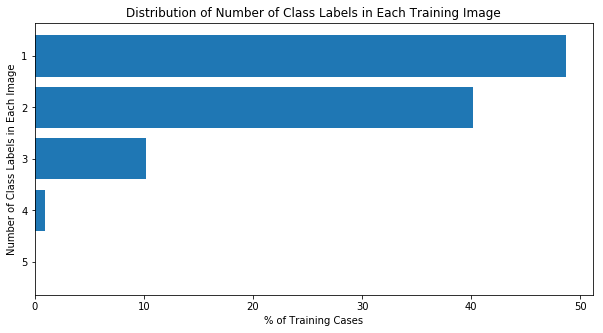

In [13]:
plt.figure(figsize=(10,5))
plt.barh(train_class_cnt4['Counts'], train_class_cnt4['Prct'])
plt.gca().invert_yaxis()
plt.xlabel('% of Training Cases')
plt.ylabel('Number of Class Labels in Each Image')
plt.title("Distribution of Number of Class Labels in Each Training Image")
plt.show()

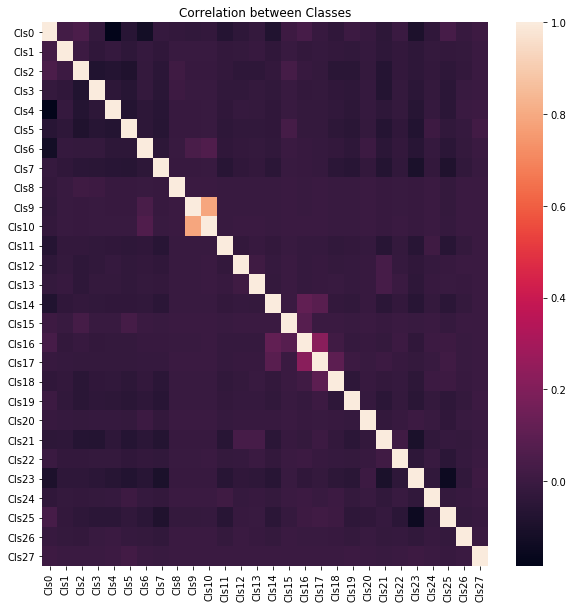

In [14]:
# Correlation between labels
import seaborn as sns
plt.figure(figsize=(10,10))
train_label_corr = train_target2.corr()
plt.title('Correlation between Classes')
#train_label_corr.head()
sns.heatmap(train_label_corr)

In [ ]:
It is seen that the most common protein class is Nucleoplasm, which is about 25% of the total training data set. It is followed by the class of Cytosol, which is about 16% of total training dta. Most of training images have one class label, \
but a few of them have as many as 5 class labels. Classes 9 and 10 (that is, Endosomes and Lysosomes) have a higher correlation, which means that they are usually located in the same image. \
Classes 16 and 17 (i.e., Cytokinetic bridge and Mitotic spindle) have certain correlation.

In [15]:
# Explore training images
from os import listdir

# Check to see if each sample has four-channel images
train_img_path=folderpath+'train'
files=listdir(train_img_path)
print('Length of files:',len(files))              
print('Number of files that are needed:', train_target2.shape[0]*4)

Length of files: 124288
Number of files that are needed: 124288


In [ ]:
The above numbers are equal which indicate that each sample has four images.

In [15]:
# Verify whether image files are corrupted (This module takes time to run)
import os
from PIL import Image

for file in os.listdir(train_img_path):
    try:
        file_path=os.path.join(train_img_path,file)
        img = Image.open(file_path) # open the image file
        img.verify() # verify that it is, in fact an image                
    except (IOError, SyntaxError) as e:
            print(file_path)
            #    print('Bad file:', filename) # print out the names of corrupt files
            os.remove(file_path)              

In [ ]:
No file is corrupted.

In [16]:
# Visualize specific class of images
class_nbr=9 # Starting from 0
train_selected_class=train_target2.loc[train_target2['Cls'+str(class_nbr)]==1]
total_cls_nbr=train_selected_class.shape[0]
print('Total number of samples with Class', class_nbr, 'is', total_cls_nbr)

Total number of samples with Class 9 is 45


In [16]:
import matplotlib.image as mpimg

def load_image(img_id, imgpath):
    images=np.zeros(shape=(4,512,512))
    #imgpath2=path.join(os.path.abspath, imgpath)
    #print(imgpath+'/'+img_id+'_blue.png')
    images[0,:,:]=mpimg.imread(imgpath+'/'+img_id+'_blue.png')
    images[1,:,:]=mpimg.imread(imgpath+'/'+img_id+'_green.png')
    images[2,:,:]=mpimg.imread(imgpath+'/'+img_id+'_red.png')
    images[3,:,:]=mpimg.imread(imgpath+'/'+img_id+'_yellow.png')
    return images

In [18]:
# Image IDs
sample_to_view=3
starting_location=1
sample_ids=[]
for i in range(sample_to_view):
    sample_ids.append(train_selected_class.iloc[starting_location-1+i].Id)
sample_ids    


['01314a58-bba3-11e8-b2b9-ac1f6b6435d0',
 '051f96a8-bbab-11e8-b2ba-ac1f6b6435d0',
 '0e029d2e-bbbf-11e8-b2ba-ac1f6b6435d0']

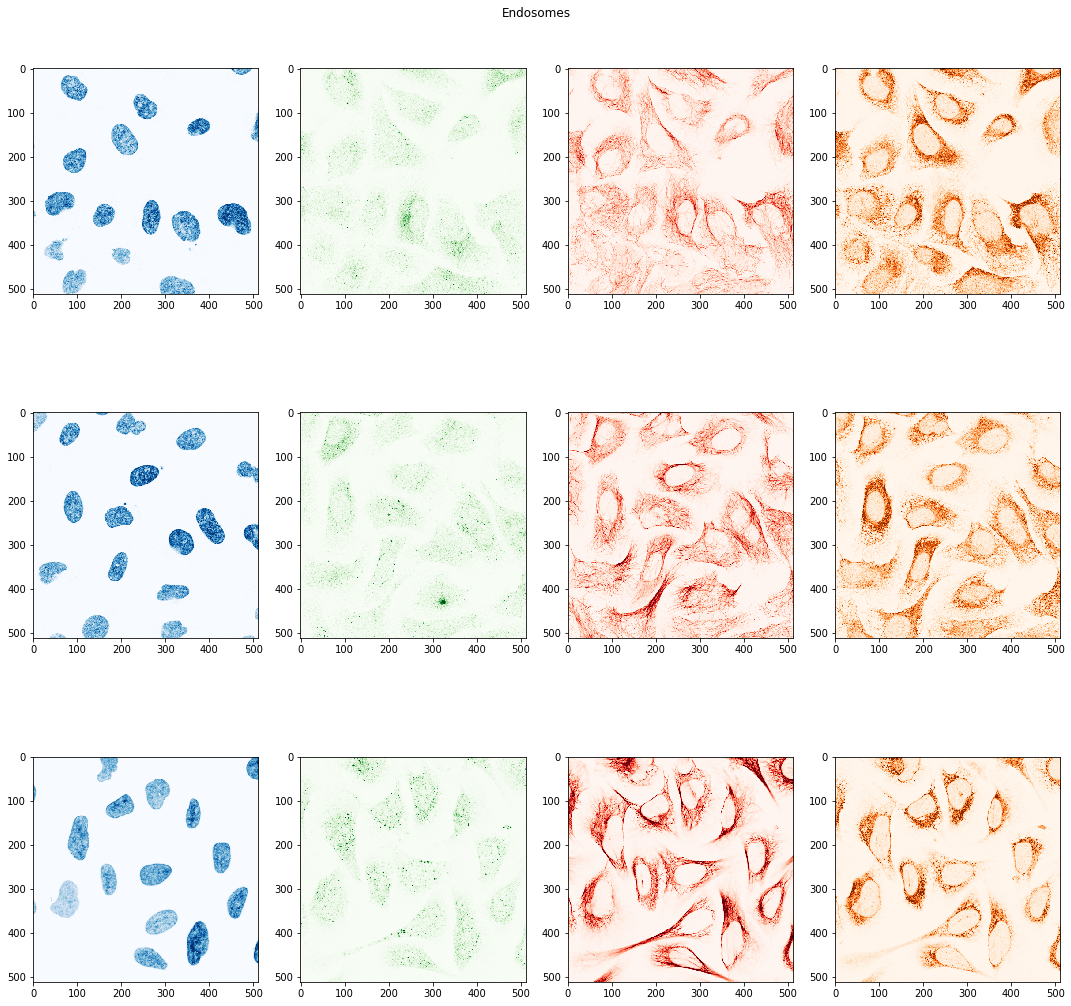

In [19]:
fig, ax = plt.subplots(sample_to_view,4,figsize=(15,5*sample_to_view))

fig.suptitle(class_labels.iloc[class_nbr].Label_Name) 
for i in range(sample_to_view):
    loaded_image=load_image(sample_ids[i],train_img_path)
    ax[i,0].imshow(loaded_image[0], cmap='Blues')
    ax[i,1].imshow(loaded_image[1], cmap='Greens')
    ax[i,2].imshow(loaded_image[2], cmap='Reds')
    ax[i,3].imshow(loaded_image[3], cmap='Oranges')
fig.tight_layout()
plt.show()


In [17]:
# Prediction data
sample_submission=pd.read_csv(folderpath+'sample_submission.csv')
sample_submission.head()

,Id,Predicted
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0


In [18]:
sample_submission2=sample_submission.join(df).fillna(0)
sample_submission2.head()

,Id,Predicted,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
print(sample_submission.Predicted.unique())
print(sample_submission.size)

[0]
23404


In [ ]:
A total number of 23,404 testing data are included in the Human Protein Image dataset.

In [25]:
# Save the processed submission file
out_trainfile=folderpath+'submission_v2.csv'
sample_submission2.to_csv(out_trainfile, index=None, encoding='utf-8')

In [26]:
# Explore testing images
from os import listdir

# Check to see if each sample has four-channel images
test_img_path=folderpath+'test'
files=listdir(test_img_path)
print('Length of files:',len(files))              
print('Number of files that are needed:', sample_submission2.shape[0]*4)

Length of files: 46808
Number of files that are needed: 46808


In [15]:
# Verify whether image files are corrupted (Takes time to run)
import os
from PIL import Image

for file in os.listdir(test_img_path):
    try:
        file_path=os.path.join(test_img_path,file)
        img = Image.open(file_path) # open the image file
        img.verify() # verify that it is, in fact an image                
    except (IOError, SyntaxError) as e:
            print(file_path)
            #    print('Bad file:', filename) # print out the names of corrupt files
            os.remove(file_path)  

In [ ]:
No image is corrupted.